In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class Environment:
    def __init__(self, prob_h) -> None:
        self.prob_h = prob_h

    def bet(self, amount):
        if random.random() < self.prob_h:
            return amount
        else:
            return -amount

In [3]:
# Implements an agent using off-policy MC control to learn the optimal policy

class Agent:
    def __init__(self, init, target, gamma = 1) -> None:
        self.gamma = gamma
        self.capital = init
        self.target = target

        self.Q = np.zeros((self.target+1, self.target))
        self.C = np.zeros((self.target+1, self.target))

    def greedy_policy(self, state):
        return np.argmax(self.Q[state]) + 1

    def policy(self, state):
        return random.randint(1, state)

    def update(self, episode):
        G = 0
        W = 1

        for state, action, reward in reversed(episode):
            G = (self.gamma * G) + reward
            self.C[state][action-1] += W
            self.Q[state][action-1] += (W / self.C[state][action-1]) * (G - self.Q[state][action-1])

            if action != self.greedy_policy(state):
                break

            W *= 1 if state == 0 else (1 / self.policy(state))

    def play(self, env):
        episode = []
        state = self.capital

        while 0 < state < self.target:
            action = self.policy(state)
            reward = env.bet(action)
            state += reward
            state = min(state, self.target)
            episode.append((state, action, reward))

        self.update(episode)

In [4]:
env = Environment(0.55)
agent = Agent(50, 100)
for i in range(10_000_000):
    print(f"Run {i}", end="\r")
    agent.play(env)

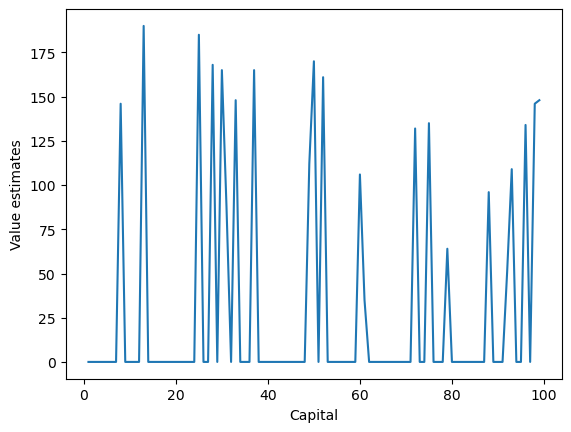

In [5]:
plt.plot(np.arange(1, 100), np.max(agent.Q, axis=1)[1:-1])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

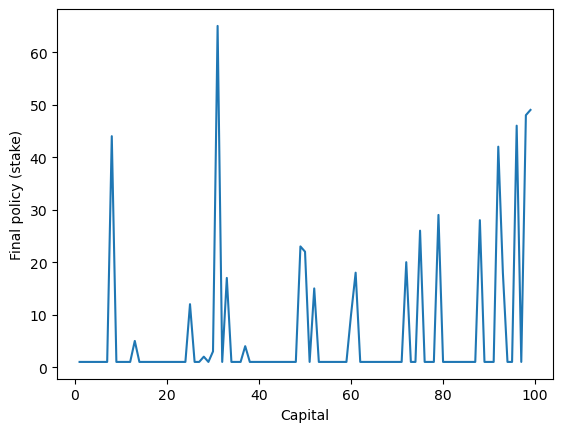

In [6]:
# Plot the policy
policy = np.zeros(100)
for i in range(1, 100):
    policy[i] = agent.greedy_policy(i)

plt.plot(np.arange(1, 100), policy[1:])
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()